<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: Neural Networks 2</center></h2>

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

RND_SEED = 7
numpy.random.seed(RND_SEED)

%matplotlib inline

# Intro

In this notebook we will recognize hand-written digits using fully-connected Neural Network (NN) and Convolutional Neural Network (CNN). 

# Load Data

Download and read MNIST sample of hand-written digits. Train sample contains 60k monochrome images with size of 28x28 pixels with values in range [0, 255]. There are 10 classes of the digits: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}.

In [2]:
from tensorflow.keras.datasets import mnist # import sample download function

(X_train, y_train), (X_test, y_test) = mnist.load_data() # dwonload and read MNIST sample

In [3]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [4]:
n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

(60000, 10000, 28, 28)

In [5]:
X_train[0] # 28 x 28 pixels with values in range [0, 255]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Plot Images

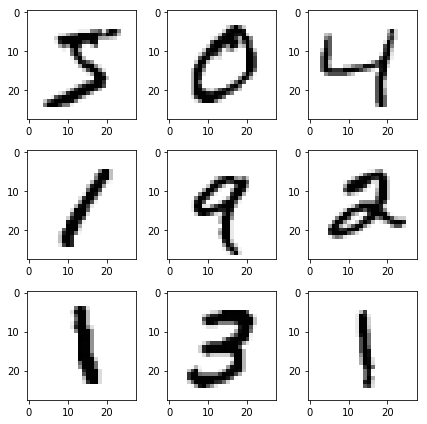

In [7]:
plt.figure(figsize=(6,6))
x, y = 3, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [8]:
# Scale X
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# Labels one-hot encoding
from tensorflow.keras.utils import to_categorical

n_classes = 10

y_train_hot = to_categorical(y_train, n_classes)
y_test_hot = to_categorical(y_test, n_classes)

# Fully-connected NN

Consider the following NN with one hidden layer:

<center><img src='img/mnist_2layers.png'></center>

It has 28x28=784 inputs and 10 output neurons. We will use [Keras](https://keras.io) library to implement this network. But firstly we need to transform 28x28 images into vectors of 784 pixels:

In [9]:
X_train_nn = X_train.reshape((n_train, -1, ))
X_test_nn = X_test.reshape((n_test, -1, ))

print('X_train:    ', X_train.shape)
print('X_train_nn: ', X_train_nn.shape)

X_train:     (60000, 28, 28)
X_train_nn:  (60000, 784)


## Create and Fit NN Model

[Keras](https://keras.io)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Convolution2D, MaxPooling2D

from tensorflow.keras import backend as K
from tensorflow.keras import initializers

In [11]:
model = Sequential() # init NN model
model.add(Dense(units=15, input_dim=img_rows*img_cols, kernel_initializer=initializers.RandomNormal(), bias_initializer=initializers.Zeros(), activation='sigmoid')) # incert one hidden layer
model.add(Dense(n_classes, activation='softmax')) # incert output layer

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Fit the model
model.fit(X_train_nn,
          y_train_hot,
          batch_size=32,
          epochs=5,
          validation_data=(X_test_nn, y_test_hot),
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.8231 - accuracy: 0.8240 - val_loss: 0.4140 - val_accuracy: 0.9006
Epoch 2/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3542 - accuracy: 0.9087 - val_loss: 0.3032 - val_accuracy: 0.9171
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2839 - accuracy: 0.9218 - val_loss: 0.2653 - val_accuracy: 0.9271
Epoch 4/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2511 - accuracy: 0.9291 - val_loss: 0.2468 - val_accuracy: 0.9305
Epoch 5/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2307 - accuracy: 0.9348 - val_loss: 0.2321 - val_accuracy: 0.9343


## Test the Model

In [13]:
y_test_pred_probas = model.predict_proba(X_test_nn)
y_test_pred_classes = model.predict_classes(X_test_nn)

In [14]:
# Predicted probas for 2 images
y_test_pred_probas[:2]

array([[2.5051221e-04, 1.5447369e-05, 3.5716700e-03, 4.6981545e-03,
        8.8083380e-06, 9.8656281e-05, 1.3516129e-06, 9.9020517e-01,
        9.5551033e-05, 1.0546204e-03],
       [3.5058544e-03, 5.5122706e-03, 8.9229196e-01, 9.8379645e-03,
        1.7267777e-06, 1.2199325e-02, 7.1618771e-03, 3.7183455e-04,
        6.9060415e-02, 5.6896843e-05]], dtype=float32)

In [15]:
# Predicted classes for 10 images
y_test_pred_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9])

In [16]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_test_pred_classes)
print("Test accuracy: ", acc)

Test accuracy:  0.9343


---

# Convolutional NN

Consider a CNN model with structure similar to this:
<center><img src='img/network.png'></center>


Where convolution is:
<center><img src='img/convolution.jpg' width="400"></center>

And pooling is:
<center><img src='img/pooling2.png' width="400"></center>

The model has 28x28x1 inputs and 10 output neurons. We will use [Keras](https://keras.io) library to implement this network. But firstly we need to transform 28x28 images into array of (28 x 28 x 1) pixels:

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
if K.image_data_format() != 'channels_last':
    shape_ord = (1, img_rows, img_cols)
else:
    shape_ord = (img_rows, img_cols, 1)

In [19]:
X_train_cnn = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test_cnn = X_test.reshape((X_test.shape[0],) + shape_ord)

print('X_train:    ', X_train.shape)
print('X_train_cnn: ', X_train_cnn.shape)

X_train:     (60000, 28, 28)
X_train_cnn:  (60000, 28, 28, 1)


## Create and Fit NN Model

[Keras](https://keras.io)

In [20]:
n_filters = 10 # number of convolutional filters
n_conv = 3 # filters size (n_conv x n_conv)
n_pool = 2 # pool size (n_pool x n_pool)

# Create CNN model
model = Sequential()

# Add convolutional and pooling layers
model.add(Convolution2D(n_filters, n_conv, padding='valid', input_shape=shape_ord, activation='relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

model.add(Convolution2D(n_filters, n_conv, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

# Flatten arrays into vectors before fully-connected layers: (X, Y, Z) -> (XYZ, )
model.add(Flatten())

# Add fully-connected layers
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)              

In [21]:
model.fit(X_train_cnn,
          y_train_hot,
          batch_size=32,
          epochs=5,
          validation_data=(X_test_cnn, y_test_hot),
          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 209us/sample - loss: 1.1501 - accuracy: 0.5733 - val_loss: 0.3109 - val_accuracy: 0.9361
Epoch 2/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.7858 - accuracy: 0.7082 - val_loss: 0.2080 - val_accuracy: 0.9566
Epoch 3/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.6809 - accuracy: 0.7489 - val_loss: 0.1376 - val_accuracy: 0.9634
Epoch 4/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.6452 - accuracy: 0.7631 - val_loss: 0.1391 - val_accuracy: 0.9669
Epoch 5/5
60000/60000 [==============================] - 11s 185us/sample - loss: 0.6161 - accuracy: 0.7758 - val_loss: 0.1300 - val_accuracy: 0.9676


## Test the Model

In [22]:
y_test_pred_probas = model.predict_proba(X_test_cnn)
y_test_pred_classes = model.predict_classes(X_test_cnn)

In [23]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_test_pred_classes)
print("Test accuracy: ", acc)

Test accuracy:  0.9676


## Transfer learning

### Download Dataset

In [24]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
img_width, img_height = 256, 256
batch_size = 64
epochs = 10
num_classes = 2

In [26]:
!wget https://www.dropbox.com/s/iotogrqhg5t02b7/hot-dog-not-hot-dog.gzt
!tar -xvf hot-dog-not-hot-dog.gzt

--2020-05-18 21:57:17--  https://www.dropbox.com/s/iotogrqhg5t02b7/hot-dog-not-hot-dog.gzt
Распознаётся www.dropbox.com (www.dropbox.com)… 2620:100:6026:1::a27d:4601, 162.125.70.1
Подключение к www.dropbox.com (www.dropbox.com)|2620:100:6026:1::a27d:4601|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: /s/raw/iotogrqhg5t02b7/hot-dog-not-hot-dog.gzt [переход]
--2020-05-18 21:57:17--  https://www.dropbox.com/s/raw/iotogrqhg5t02b7/hot-dog-not-hot-dog.gzt
Повторное использование соединения с [www.dropbox.com]:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://ucb1e23788e968d0509029a1fbd0.dl.dropboxusercontent.com/cd/0/inline/A3_4Uf2NjVkC3Ij4lp9aH-NksZAHhLTxCl0s7aMUTpxI1Ws25Ozjz9O_Z-XtTaJGcuOEtD7CpmpKIl2xyG5sqgKpkj7OrOHePvI-dTYqodE8Z_8QBs0nn5-XVm-CjzXP8TE/file# [переход]
--2020-05-18 21:57:18--  https://ucb1e23788e968d0509029a1fbd0.dl.dropboxusercontent.com/cd/0/inline/A3_4Uf2NjVkC3Ij4lp9aH-NksZAHhLTxCl0s7aMUTpxI1Ws25Ozj

x hot-dog-not-hot-dog/train/hot_dog/3655069.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3847289.jpg
x hot-dog-not-hot-dog/train/hot_dog/3847289.jpg
x hot-dog-not-hot-dog/train/hot_dog/._125329.jpg
x hot-dog-not-hot-dog/train/hot_dog/125329.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1086377.jpg
x hot-dog-not-hot-dog/train/hot_dog/1086377.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1040579.jpg
x hot-dog-not-hot-dog/train/hot_dog/1040579.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1115020.jpg
x hot-dog-not-hot-dog/train/hot_dog/1115020.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1143110.jpg
x hot-dog-not-hot-dog/train/hot_dog/1143110.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1144643.jpg
x hot-dog-not-hot-dog/train/hot_dog/1144643.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1234491.jpg
x hot-dog-not-hot-dog/train/hot_dog/1234491.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3844876.jpg
x hot-dog-not-hot-dog/train/hot_dog/3844876.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1017226.jpg
x hot-dog-not-hot-dog/

x hot-dog-not-hot-dog/train/hot_dog/3494550.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3552463.jpg
x hot-dog-not-hot-dog/train/hot_dog/3552463.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3860703.jpg
x hot-dog-not-hot-dog/train/hot_dog/3860703.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3645373.jpg
x hot-dog-not-hot-dog/train/hot_dog/3645373.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3660087.jpg
x hot-dog-not-hot-dog/train/hot_dog/3660087.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3568139.jpg
x hot-dog-not-hot-dog/train/hot_dog/3568139.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3493406.jpg
x hot-dog-not-hot-dog/train/hot_dog/3493406.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1134237.jpg
x hot-dog-not-hot-dog/train/hot_dog/1134237.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1335350.jpg
x hot-dog-not-hot-dog/train/hot_dog/1335350.jpg
x hot-dog-not-hot-dog/train/hot_dog/._3905238.jpg
x hot-dog-not-hot-dog/train/hot_dog/3905238.jpg
x hot-dog-not-hot-dog/train/hot_dog/._1068951.jpg
x hot-dog-not-hot-do

x hot-dog-not-hot-dog/train/not_hot_dog/._107013.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/107013.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._183313.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/183313.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._89892.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/89892.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._134369.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/134369.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._140832.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/140832.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._105375.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/105375.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._163153.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/163153.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._776077.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/776077.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._779193.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/779193.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._166217.jpg
x hot-dog-not

x hot-dog-not-hot-dog/train/not_hot_dog/103010.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._108743.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/108743.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._274368.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/274368.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._206271.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/206271.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._194973.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/194973.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._5813.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/5813.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._239724.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/239724.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._100135.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/100135.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._320734.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/320734.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._759160.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/759160.jpg
x hot-dog-not-hot

x hot-dog-not-hot-dog/train/not_hot_dog/191085.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._99136.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/99136.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._129050.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/129050.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._244006.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/244006.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._185190.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/185190.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._147558.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/147558.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._91432.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/91432.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._331674.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/331674.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._90923.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/90923.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/._90116.jpg
x hot-dog-not-hot-dog/train/not_hot_dog/90116.jpg
x hot-dog-not-hot-dog

x hot-dog-not-hot-dog/seefood/train/hot_dog/._117749.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/117749.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._3758438.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/3758438.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1192908.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1192908.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._5079.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/5079.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1119906.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1119906.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1361187.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1361187.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1251087.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1251087.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1322860.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1322860.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._938937.jpg
x hot-dog-not-hot-dog/seefood/train/hot

x hot-dog-not-hot-dog/seefood/train/hot_dog/1251741.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._3726741.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/3726741.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._2417.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/2417.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1268739.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1268739.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._3701301.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/3701301.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1182402.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1182402.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._940404.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/940404.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1265953.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1265953.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._978158.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/978158.jpg
x hot-dog-not-hot-dog/seefood/train/hot_do

x hot-dog-not-hot-dog/seefood/train/hot_dog/._115434.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/115434.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._3728106.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/3728106.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._3789737.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/3789737.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1179964.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1179964.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1301907.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1301907.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._76722.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/76722.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._941035.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/941035.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._1224013.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/1224013.jpg
x hot-dog-not-hot-dog/seefood/train/hot_dog/._3811761.jpg
x hot-dog-not-hot-dog/seefood/train/ho

x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._296039.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/296039.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._302329.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/302329.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._107216.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/107216.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._99890.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/99890.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._109401.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/109401.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._213387.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/213387.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._311779.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/311779.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._110385.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/110385.jpg
x hot-dog-not-hot-dog/seefood/train/not_ho

x hot-dog-not-hot-dog/seefood/train/not_hot_dog/275673.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._251128.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/251128.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._791662.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/791662.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._149278.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/149278.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._192132.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/192132.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._90989.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/90989.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._292607.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/292607.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._322067.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/322067.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._164288.jpg
x hot-dog-not-hot-dog/seefood/train/not_ho

x hot-dog-not-hot-dog/seefood/train/not_hot_dog/236973.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._130766.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/130766.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._123929.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/123929.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._781137.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/781137.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._98675.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/98675.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._134598.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/134598.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._1164.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/1164.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._202247.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/202247.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_dog/._172042.jpg
x hot-dog-not-hot-dog/seefood/train/not_hot_do

x hot-dog-not-hot-dog/seefood/test/hot_dog/._566784.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/566784.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._486658.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/486658.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._417155.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/417155.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._289042.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/289042.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._619671.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/619671.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._307874.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/307874.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._505584.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/505584.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._324507.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/324507.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._142835.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/142835.jpg
x hot-dog-

x hot-dog-not-hot-dog/seefood/test/hot_dog/393123.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._838604.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/838604.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._652826.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/652826.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._533521.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/533521.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._677481.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/677481.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._391898.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/391898.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._135628.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/135628.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._800992.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/800992.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._287752.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/287752.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._537584.jpg
x hot-dog-

x hot-dog-not-hot-dog/seefood/test/hot_dog/716049.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._762910.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/762910.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._154545.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/154545.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._805852.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/805852.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._292683.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/292683.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._642331.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/642331.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._724711.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/724711.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._209306.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/209306.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._784362.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/784362.jpg
x hot-dog-not-hot-dog/seefood/test/hot_dog/._289472.jpg
x hot-dog-

x hot-dog-not-hot-dog/seefood/test/not_hot_dog/24656.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._27410.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/27410.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._20627.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/20627.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._86180.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/86180.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._46401.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/46401.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._50277.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/50277.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._7056.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/7056.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._9053.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/9053.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._76061.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/76061.jpg
x hot-dog-not-hot-d

x hot-dog-not-hot-dog/seefood/test/not_hot_dog/30731.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._57594.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/57594.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._82578.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/82578.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._22080.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/22080.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._7394.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/7394.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._48073.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/48073.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._38768.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/38768.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._14484.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/14484.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._58856.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/58856.jpg
x hot-dog-not-hot

x hot-dog-not-hot-dog/seefood/test/not_hot_dog/43924.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._66533.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/66533.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._71701.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/71701.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._25026.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/25026.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._35235.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/35235.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._33485.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/33485.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._70218.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/70218.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._59675.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/59675.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/._75638.jpg
x hot-dog-not-hot-dog/seefood/test/not_hot_dog/75638.jpg
x hot-dog-not-h

x hot-dog-not-hot-dog/test/hot_dog/690320.jpg
x hot-dog-not-hot-dog/test/hot_dog/._697329.jpg
x hot-dog-not-hot-dog/test/hot_dog/697329.jpg
x hot-dog-not-hot-dog/test/hot_dog/._133015.jpg
x hot-dog-not-hot-dog/test/hot_dog/133015.jpg
x hot-dog-not-hot-dog/test/hot_dog/._267629.jpg
x hot-dog-not-hot-dog/test/hot_dog/267629.jpg
x hot-dog-not-hot-dog/test/hot_dog/._650514.jpg
x hot-dog-not-hot-dog/test/hot_dog/650514.jpg
x hot-dog-not-hot-dog/test/hot_dog/._697073.jpg
x hot-dog-not-hot-dog/test/hot_dog/697073.jpg
x hot-dog-not-hot-dog/test/hot_dog/._701763.jpg
x hot-dog-not-hot-dog/test/hot_dog/701763.jpg
x hot-dog-not-hot-dog/test/hot_dog/._198641.jpg
x hot-dog-not-hot-dog/test/hot_dog/198641.jpg
x hot-dog-not-hot-dog/test/hot_dog/._826706.jpg
x hot-dog-not-hot-dog/test/hot_dog/826706.jpg
x hot-dog-not-hot-dog/test/hot_dog/._741637.jpg
x hot-dog-not-hot-dog/test/hot_dog/741637.jpg
x hot-dog-not-hot-dog/test/hot_dog/._398941.jpg
x hot-dog-not-hot-dog/test/hot_dog/398941.jpg
x hot-dog-not-

x hot-dog-not-hot-dog/test/hot_dog/171875.jpg
x hot-dog-not-hot-dog/test/hot_dog/._756061.jpg
x hot-dog-not-hot-dog/test/hot_dog/756061.jpg
x hot-dog-not-hot-dog/test/hot_dog/._349375.jpg
x hot-dog-not-hot-dog/test/hot_dog/349375.jpg
x hot-dog-not-hot-dog/test/hot_dog/._635712.jpg
x hot-dog-not-hot-dog/test/hot_dog/635712.jpg
x hot-dog-not-hot-dog/test/hot_dog/._307557.jpg
x hot-dog-not-hot-dog/test/hot_dog/307557.jpg
x hot-dog-not-hot-dog/test/hot_dog/._815805.jpg
x hot-dog-not-hot-dog/test/hot_dog/815805.jpg
x hot-dog-not-hot-dog/test/hot_dog/._377852.jpg
x hot-dog-not-hot-dog/test/hot_dog/377852.jpg
x hot-dog-not-hot-dog/test/hot_dog/._161911.jpg
x hot-dog-not-hot-dog/test/hot_dog/161911.jpg
x hot-dog-not-hot-dog/test/hot_dog/._510674.jpg
x hot-dog-not-hot-dog/test/hot_dog/510674.jpg
x hot-dog-not-hot-dog/test/hot_dog/._248122.jpg
x hot-dog-not-hot-dog/test/hot_dog/248122.jpg
x hot-dog-not-hot-dog/test/hot_dog/._335113.jpg
x hot-dog-not-hot-dog/test/hot_dog/335113.jpg
x hot-dog-not-

x hot-dog-not-hot-dog/test/hot_dog/528022.jpg
x hot-dog-not-hot-dog/test/hot_dog/._531567.jpg
x hot-dog-not-hot-dog/test/hot_dog/531567.jpg
x hot-dog-not-hot-dog/test/hot_dog/._324480.jpg
x hot-dog-not-hot-dog/test/hot_dog/324480.jpg
x hot-dog-not-hot-dog/test/hot_dog/._267988.jpg
x hot-dog-not-hot-dog/test/hot_dog/267988.jpg
x hot-dog-not-hot-dog/test/hot_dog/._533172.jpg
x hot-dog-not-hot-dog/test/hot_dog/533172.jpg
x hot-dog-not-hot-dog/test/hot_dog/._171607.jpg
x hot-dog-not-hot-dog/test/hot_dog/171607.jpg
x hot-dog-not-hot-dog/test/hot_dog/._471340.jpg
x hot-dog-not-hot-dog/test/hot_dog/471340.jpg
x hot-dog-not-hot-dog/test/hot_dog/._422730.jpg
x hot-dog-not-hot-dog/test/hot_dog/422730.jpg
x hot-dog-not-hot-dog/test/hot_dog/._818233.jpg
x hot-dog-not-hot-dog/test/hot_dog/818233.jpg
x hot-dog-not-hot-dog/test/hot_dog/._703550.jpg
x hot-dog-not-hot-dog/test/hot_dog/703550.jpg
x hot-dog-not-hot-dog/test/hot_dog/._632174.jpg
x hot-dog-not-hot-dog/test/hot_dog/632174.jpg
x hot-dog-not-

x hot-dog-not-hot-dog/test/not_hot_dog/45035.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._6926.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/6926.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._59144.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/59144.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._62663.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/62663.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._24145.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/24145.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._54461.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/54461.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._17969.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/17969.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._42954.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/42954.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._34632.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/34632.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._9547.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/9547.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._40762.jpg
x ho

x hot-dog-not-hot-dog/test/not_hot_dog/._45896.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/45896.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._44578.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/44578.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._20983.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/20983.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._35430.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/35430.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._37384.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/37384.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._24844.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/24844.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._7847.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/7847.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._62622.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/62622.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._22777.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/22777.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/._43376.jpg
x hot-dog-not-hot-dog/test/not_hot_dog/43376.jpg
x 

In [27]:
images = []
labels = []

for image_path in glob.glob('./hot-dog-not-hot-dog/*/*hot_dog/*.jpg'):
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
            
        images.append(image)
        if '/hot_dog' in image_path:
            labels.append(1)
        if '/not_hot_dog' in image_path:
            labels.append(0)
    except Exception as e:
        print(e)

In [28]:
images = np.array(images).astype(np.float32) / 255.0
labels = np.array(labels).astype(np.float32)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [30]:
datagen = ImageDataGenerator(
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30
)

### Download model

In [31]:
from tensorflow.keras import applications

In [32]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

In [33]:
#not fit all layers
for layer in model.layers[:5]:
    layer.trainable = False

### Create model

In [34]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [36]:
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = "categorical_crossentropy", 
                    optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), 
                    metrics=["accuracy"])

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [38]:
checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [39]:
FIT = False
# don't fit now, becuase it is quite long

In [40]:
if FIT:
    model_final.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=32,
                    validation_data=(X_test, y_test),
                    workers=4,
                    callbacks=[checkpoint, early])

In [41]:
y_pred = model_final.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy_score(y_pred=y_pred_labels, y_true=y_test[:,1])

0.5272727272727272